In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("noWindSpeed_pd.csv")

data_visualize

,DAT,WL_Flume (m3/hour),WL_Flume_OUT (m3/hour),Solar (W/m2),Precipitation (mm),AirTemp (DegC),RH (%),delta PD (mm)
0,164.791667,0.024406,0.156048,42,0.000,24.20,84.90,-0.1
1,164.833333,0.031719,0.136486,4,0.000,23.30,88.40,-0.1
2,164.875000,0.031719,0.136486,0,0.000,22.80,90.50,-0.1
3,164.916667,0.031719,0.060883,0,0.000,22.60,91.50,-0.1
4,164.958333,0.040201,0.049905,0,1.766,22.60,92.40,0.2
...,...,...,...,...,...,...,...,...
2442,267.250000,0.000000,0.000000,0,0.000,2.29,101.16,-0.1
2443,267.291667,0.000000,0.000000,12,0.000,2.33,101.20,0.0
2444,267.333333,0.000000,0.000000,82,0.017,2.12,101.22,0.0
2445,267.375000,0.000000,0.000000,195,0.000,1.91,101.22,0.0


In [8]:
LEARNING_RATE = 0.0001
TRAINNING_STEP = 200000
DISPLAY_STEP = 10000

X_LABLE = len(data_visualize.columns) - 1

In [9]:
data = np.loadtxt("noWindSpeed_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

w1 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
w2 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [10]:
def compute_loss():
    hypothesis = tf.matmul(x_train * x_train, w1) + tf.matmul(x_train, w2) + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w1, w2, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w1:\n', w1.numpy(), '\n', 'w2:\n', w2.numpy(), '\n', 
              'bias:', bias.numpy(), '\n', 'loss:', compute_loss().numpy(), '\n')

step: 10000 
 w1:
 [[-0.01627315]
 [ 0.72448426]
 [-0.09083795]
 [-0.000859  ]
 [ 0.15950236]
 [ 0.40881777]
 [ 0.05869567]] 
 w2:
 [[ 0.12192462]
 [ 0.6650455 ]
 [-0.08449674]
 [ 0.66732126]
 [ 0.24309094]
 [ 0.7029389 ]
 [ 0.59331733]] 
 bias: -0.19361092 
 loss: 52543.426 

step: 20000 
 w1:
 [[-0.0002104 ]
 [ 0.08229602]
 [ 0.07242223]
 [-0.0003608 ]
 [ 0.07544646]
 [-0.02945117]
 [-0.00264094]] 
 w2:
 [[-0.04234787]
 [ 0.08070723]
 [-0.06482893]
 [ 0.28605625]
 [ 0.08989596]
 [ 0.26719293]
 [ 0.39322644]] 
 bias: -0.4780622 
 loss: 449.99234 

step: 30000 
 w1:
 [[ 2.7292385e-04]
 [-1.5186146e-04]
 [-1.2582444e-02]
 [ 6.2816071e-08]
 [-7.8539057e-03]
 [-8.7086502e-03]
 [-2.2092643e-03]] 
 w2:
 [[-1.0639512e-01]
 [-8.9275919e-02]
 [ 1.2937200e-01]
 [ 1.8804321e-04]
 [ 1.6690657e-01]
 [ 2.4117659e-01]
 [ 3.1164241e-01]] 
 bias: -0.6063676 
 loss: 0.30164555 

step: 40000 
 w1:
 [[ 2.9685081e-04]
 [ 4.7148759e-03]
 [-8.3466563e-03]
 [ 4.3838327e-07]
 [ 4.0748439e-04]
 [-5.8678412e-03

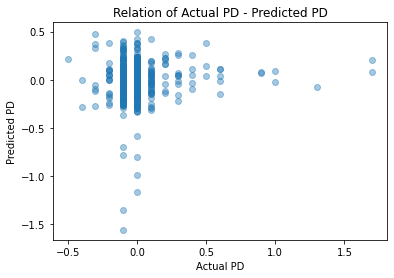

In [11]:
y_hat = tf.matmul(x_test * x_test, w1) + tf.matmul(x_test, w2) + bias

plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [12]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.25463766
MAE: 0.16667123
